In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# Load the datasets
#merged_data = pd.read_csv("merged_data.csv")

# Load dataset
file_path = 'merged_data.csv'
df = pd.read_csv(file_path, parse_dates=True)

In [90]:
# Attempt to parse date columns
def parse_dates(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if column is object type
            try:
                df[col] = pd.to_datetime(df[col])
                print(f'Parsed {col} as datetime.')
            except ValueError:
                continue  # Skip columns that can't be parsed
    return df

df = parse_dates(df)

Parsed date as datetime.


/var/folders/kf/4vf9b0_j063c6zf0vs_tltrc0000gn/T/ipykernel_73679/2651756625.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [95]:
df.head()
# Check for missing values



,date,discharge_mean,discharge_max,discharge_min,water_level_mean,water_level_max,water_level_min,om_discharge,soil_moisture_0_to_100cm_mean,soil_moisture_7_to_28cm_mean,soil_moisture_0_to_7cm_mean,precipitation_sum,rain_sum,weather_code,weather_description,date_year,date_month,date_day,date_dayofweek,date_weekofyear
0,2015-06-26,6.27,6.41,6.11,29.0,29.0,28.0,1.624219,0.258290,0.266292,0.251417,0.0,0.0,61.0,"Rain, not freezing, continuous, slight at time...",2015.0,6.0,26.0,4.0,26
1,2015-06-27,6.65,7.94,6.10,30.0,34.0,28.0,1.529298,0.254372,0.258583,0.258417,7.2,7.2,51.0,"Drizzle, not freezing, continuous, slight at t...",2015.0,6.0,27.0,5.0,26
2,2015-06-28,7.15,7.62,6.68,32.0,33.0,30.0,1.500346,0.252399,0.260167,0.260625,0.3,0.3,51.0,"Drizzle, not freezing, continuous, slight at t...",2015.0,6.0,28.0,6.0,26
3,2015-06-29,6.51,6.68,6.37,29.0,30.0,29.0,1.437811,0.247408,0.254125,0.245167,0.3,0.3,3.0,Clouds generally forming or developing,2015.0,6.0,29.0,0.0,27
4,2015-06-30,6.17,6.37,5.78,28.0,29.0,27.0,1.376840,0.242139,0.246417,0.232875,0.0,0.0,0.0,Cloud development not observed or not observable,2015.0,6.0,30.0,1.0,27


In [97]:
# Feature Engineering (Extracting date components)
if any(df.select_dtypes(include=['datetime64']).columns):
    for col in df.select_dtypes(include=['datetime64']).columns:
        df[col+'_year'] = df[col].dt.year
        df[col+'_month'] = df[col].dt.month
        df[col+'_day'] = df[col].dt.day
        df[col+'_dayofweek'] = df[col].dt.dayofweek
        df[col+'_weekofyear'] = df[col].dt.isocalendar().week

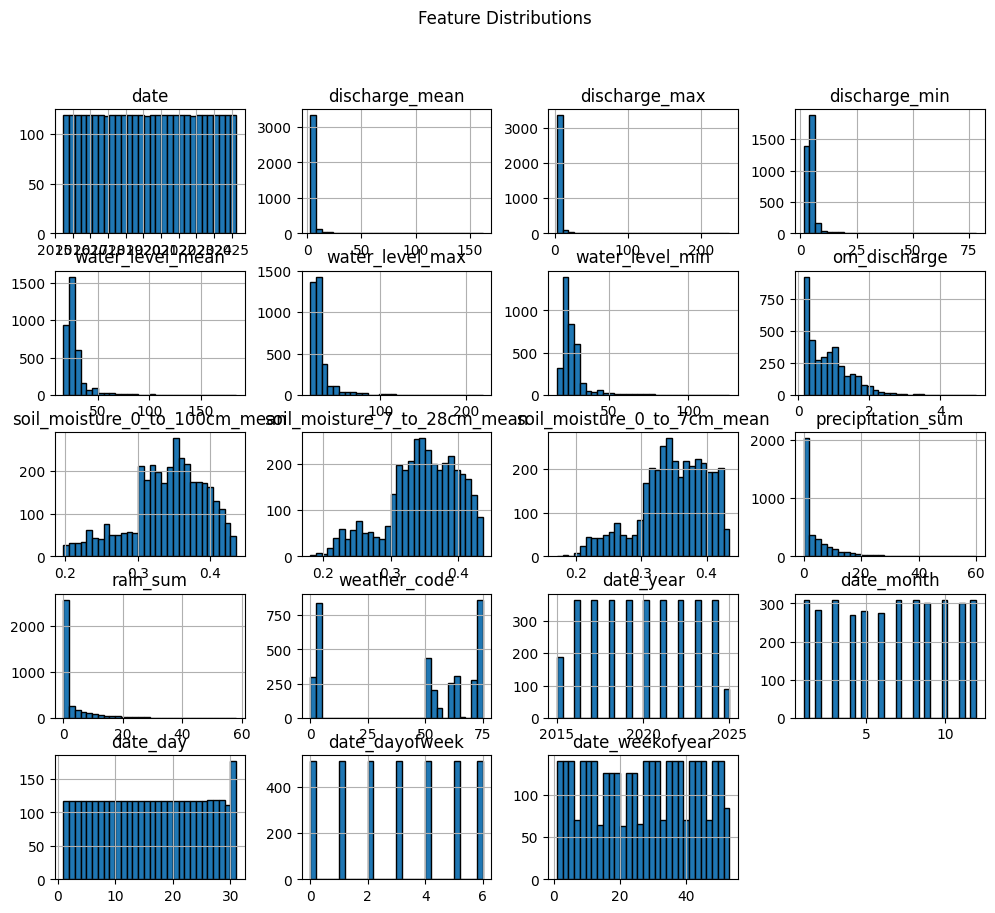

In [98]:
# Histograms of numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

In [101]:
# The cumulative discharge is calculated as the sum of the daily discharge values over time. The formula for cumulative discharge is:
# Q_cum(n) = Q_cum(n-1) + Q(n)
# Cumulative Cischarge on Day n = Cumulative Discharge on Day n-1 + Discharge on day n

df['discharge_cum'] = df['discharge_mean'].cumsum()
# Reorder the columns to place 'discharge_cum' after 'discharge_mean'
columns = df.columns.tolist()
columns.insert(columns.index('discharge_mean') + 1, columns.pop(columns.index('discharge_cum')))

df = df[columns]
print(df)

           date  discharge_mean  discharge_cum  discharge_max  discharge_min  \
0    2015-06-26            6.27           6.27           6.41           6.11   
1    2015-06-27            6.65          12.92           7.94           6.10   
2    2015-06-28            7.15          20.07           7.62           6.68   
3    2015-06-29            6.51          26.58           6.68           6.37   
4    2015-06-30            6.17          32.75           6.37           5.78   
...         ...             ...            ...            ...            ...   
3563 2025-03-28            2.89       19819.96           2.93           2.74   
3564 2025-03-29            2.92       19822.88           3.13           2.74   
3565 2025-03-30            3.42       19826.30           3.54           3.13   
3566 2025-03-31            3.33       19829.63           3.54           3.33   
3567        NaT             NaN            NaN            NaN            NaN   

      water_level_mean  water_level_max

In [106]:
# The cumulative discharge is calculated as the sum of the daily discharge values over time. The formula for cumulative discharge is:
# Q_cum(n) = Q_cum(n-1) + Q(n)
# Cumulative Cischarge on Day n = Cumulative Discharge on Day n-1 + Discharge on day n

df['precipitation_cum'] = df['precipitation_sum'].cumsum()
# Reorder the columns to place 'discharge_cum' after 'discharge_mean'
columns = df.columns.tolist()
columns.insert(columns.index('precipitation_sum') + 1, columns.pop(columns.index('precipitation_cum')))

df_cum = df[columns]
print(df_cum)

           date  discharge_mean  discharge_cum  discharge_max  discharge_min  \
0    2015-06-26            6.27           6.27           6.41           6.11   
1    2015-06-27            6.65          12.92           7.94           6.10   
2    2015-06-28            7.15          20.07           7.62           6.68   
3    2015-06-29            6.51          26.58           6.68           6.37   
4    2015-06-30            6.17          32.75           6.37           5.78   
...         ...             ...            ...            ...            ...   
3563 2025-03-28            2.89       19819.96           2.93           2.74   
3564 2025-03-29            2.92       19822.88           3.13           2.74   
3565 2025-03-30            3.42       19826.30           3.54           3.13   
3566 2025-03-31            3.33       19829.63           3.54           3.33   
3567        NaT             NaN            NaN            NaN            NaN   

      water_level_mean  water_level_max

In [107]:
print(df_cum.columns.tolist())

['date', 'discharge_mean', 'discharge_cum', 'discharge_max', 'discharge_min', 'water_level_mean', 'water_level_max', 'water_level_min', 'om_discharge', 'soil_moisture_0_to_100cm_mean', 'soil_moisture_7_to_28cm_mean', 'soil_moisture_0_to_7cm_mean', 'precipitation_sum', 'precipitation_cum', 'rain_sum', 'weather_code', 'weather_description', 'date_year', 'date_month', 'date_day', 'date_dayofweek', 'date_weekofyear']


In [108]:
# 'soil_moisture_7_to_28cm_mean', 'soil_moisture_0_to_7cm_mean',
columns_to_drop = ['precipitation_sum', 'soil_moisture_0_to_100cm_mean', 'soil_moisture_0_to_7cm_mean', 'om_discharge', 'discharge_mean', 'discharge_max', 'discharge_min', 'water_level_max', 'water_level_min', 'rain_sum', 'weather_code', 'weather_description', 'date_year', 'date_month', 'date_day', 'date_dayofweek', 'date_weekofyear']
df_cum = df_cum.drop(columns=columns_to_drop)

In [110]:
df_cum.head()

,date,discharge_cum,water_level_mean,soil_moisture_7_to_28cm_mean,precipitation_cum
0,2015-06-26,6.27,29.0,0.266292,0.0
1,2015-06-27,12.92,30.0,0.258583,7.2
2,2015-06-28,20.07,32.0,0.260167,7.5
3,2015-06-29,26.58,29.0,0.254125,7.8
4,2015-06-30,32.75,28.0,0.246417,7.8


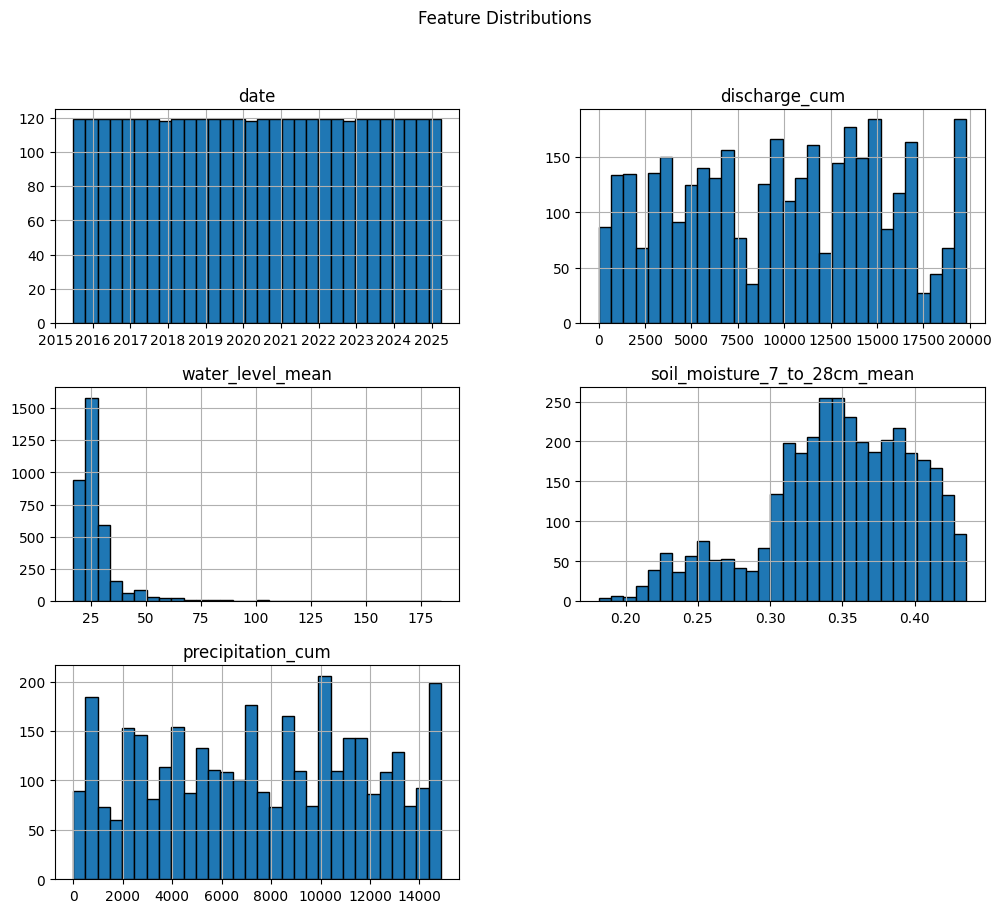

In [115]:
# Histograms of numerical features

df_cum.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

Summary Statistics:
                      date  discharge_cum  water_level_mean  \
count                 3567    3567.000000       3567.000000   
mean   2020-05-13 00:00:00    9875.470460         28.244183   
min    2015-06-26 00:00:00       6.270000         17.000000   
25%    2017-12-03 12:00:00    5137.275000         22.000000   
50%    2020-05-13 00:00:00   10031.710000         25.000000   
75%    2022-10-21 12:00:00   14478.300000         29.000000   
max    2025-03-31 00:00:00   19829.630000        184.000000   
std                    NaN    5572.144076         11.499230   

       soil_moisture_7_to_28cm_mean  precipitation_cum  
count                   3567.000000        3567.000000  
mean                       0.347181        7577.476274  
min                        0.181500           0.000000  
25%                        0.317500        3929.300035  
50%                        0.351083        7488.100096  
75%                        0.387583       11233.750097  
max          

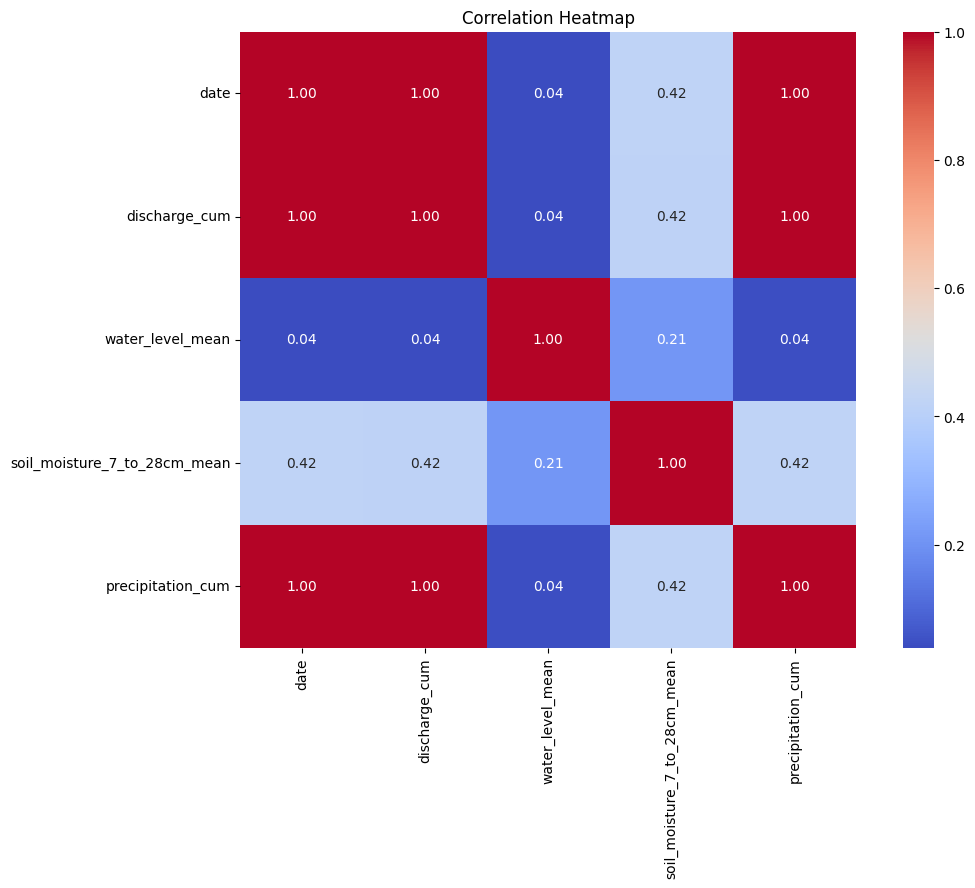

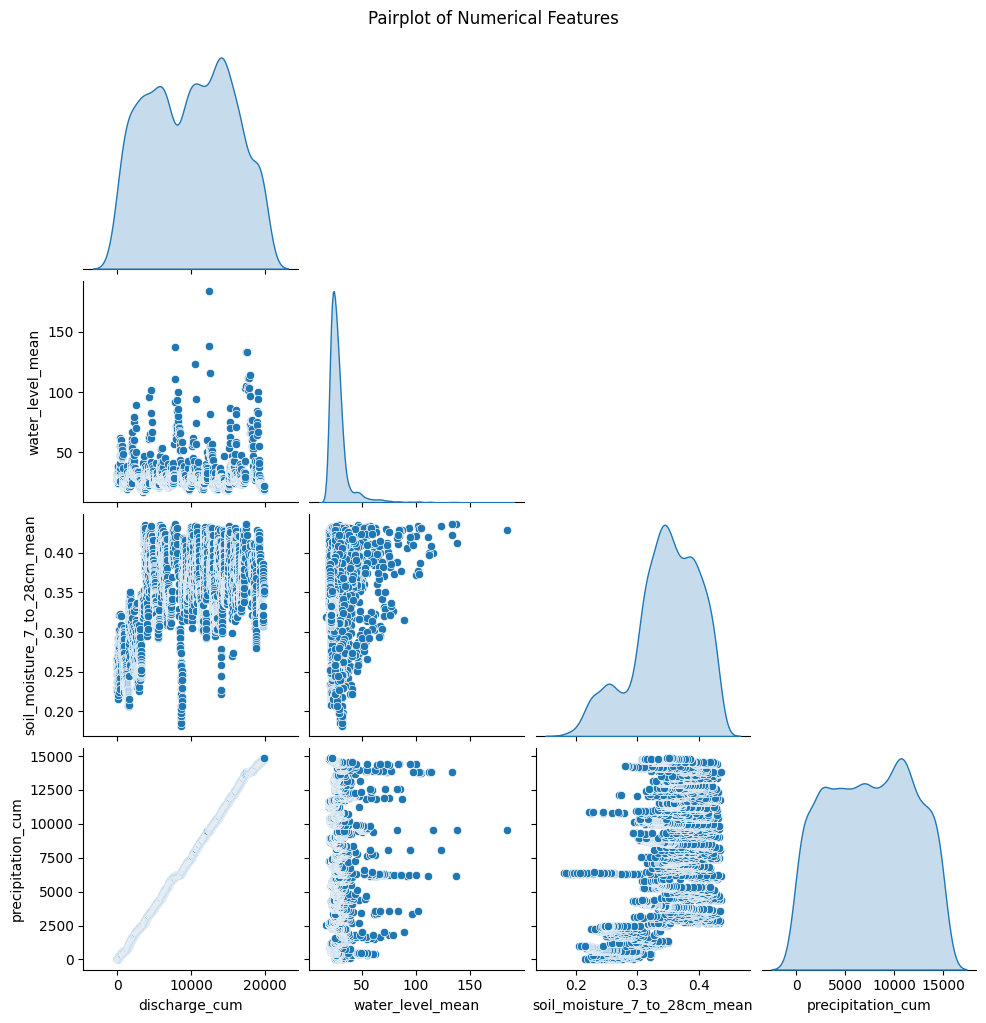

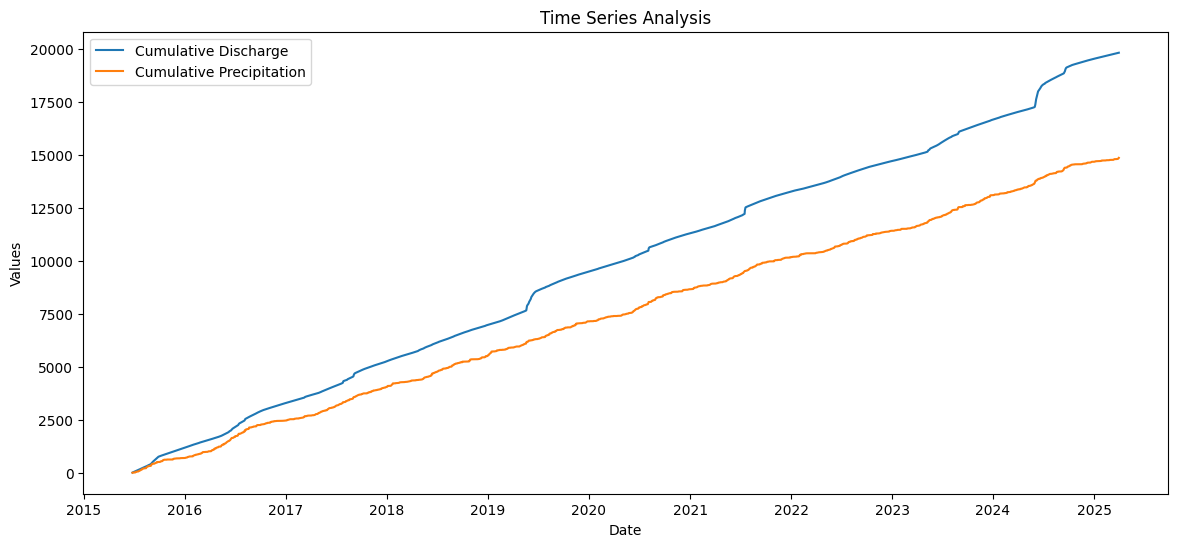

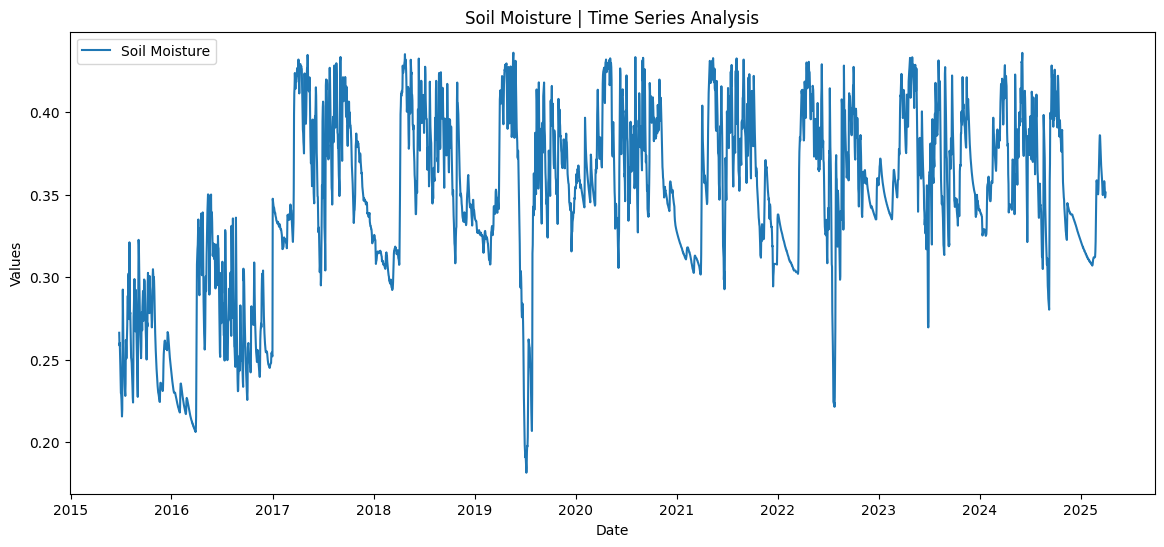

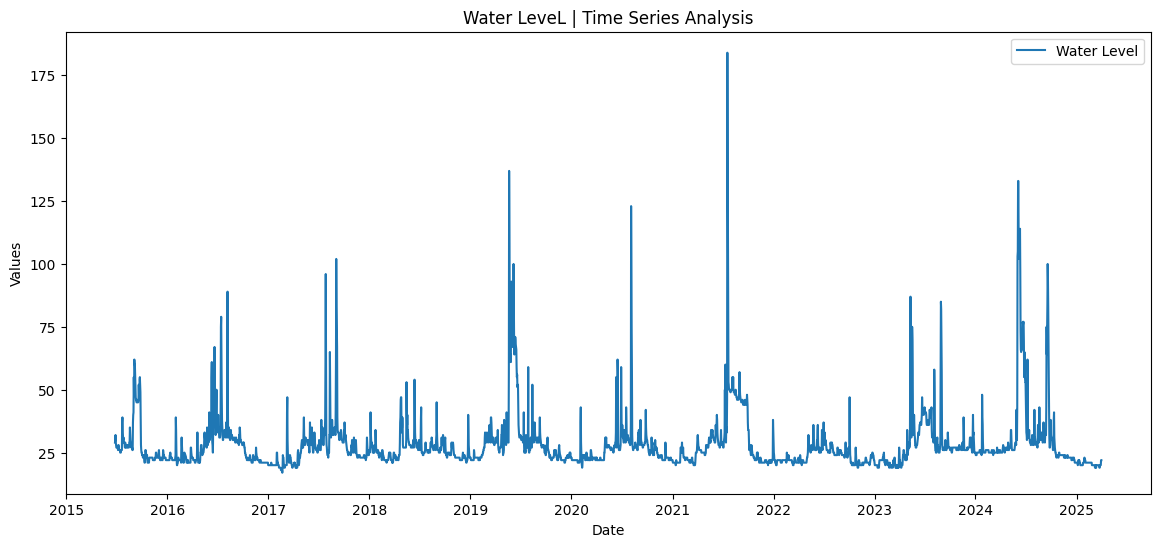

In [83]:
# Summary Statistics
print("Summary Statistics:")
print(df_cum.describe())


# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_cum.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df_cum, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Time Series Analysis
plt.figure(figsize=(14, 6))
plt.plot(df_cum['date'], df_cum['discharge_cum'], label='Cumulative Discharge')
plt.plot(df_cum['date'], df_cum['precipitation_cum'], label='Cumulative Precipitation')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Time Series Analysis")
plt.legend()
plt.show()

# Time Series Analysis
plt.figure(figsize=(14, 6))
plt.plot(df_cum['date'], df_cum['soil_moisture_7_to_28cm_mean'], label='Soil Moisture')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Soil Moisture | Time Series Analysis")
plt.legend()
plt.show()

# Time Series Analysis
plt.figure(figsize=(14, 6))
plt.plot(df_cum['date'], df_cum['water_level_mean'], label='Water Level')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Water LeveL | Time Series Analysis")
plt.legend()
plt.show()


    



In [118]:
output_file_path = 'climate_data.csv'
df_cum.to_csv(output_file_path, index=False)

df_cum.to_csv('climate_data.csv')